In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import numpy as np
tf.__version__

'2.1.0'

In [5]:
bike = pd.read_csv('./dados/bike.csv')

In [6]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,82,1518,1600


In [7]:
bike.drop(
    labels = ['instant','casual','registered'],
    axis=1,
    inplace = True, #ele faz alteração
)

#ou 

#bike = bike.drop(
#    label = ['instant','casual','registered'],
#    axis=1,
#    )

In [8]:
bike.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.627894,0.190486,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.142429,0.077498,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.000000,0.022392,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.520000,0.134950,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.626667,0.180975,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.730209,0.233214,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.972500,0.507463,8714.000000


In [9]:
#Visualizar se existe registro NaN com tabela
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
cnt           731 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 68.6+ KB


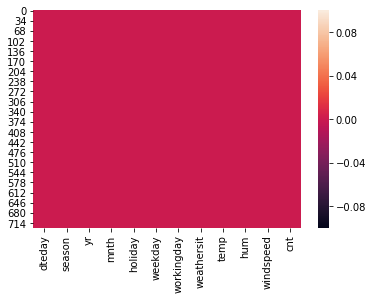

In [10]:
#Visualizar se existe registro NaN com gráfico

sns.heatmap(bike.isnull())
#Não existe...

In [11]:
# Trocar formato das datas

bike['dteday'] = pd.to_datetime(
    bike.dteday,
    format = '%m/%d/%Y',
)
#Formato americao que colocamos

In [12]:
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


In [13]:
bike.index = bike.dteday #Passar pro índice
bike.drop('dteday',axis = 1, inplace = True) #Apagar

In [14]:
#bike

In [15]:
# Visualizar os dados

Text(0, 0.5, 'Bike rental')

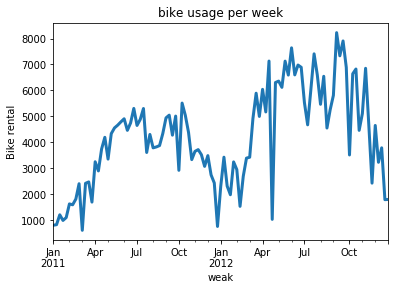

In [16]:
bike['cnt'].asfreq(
    'W',#WEAK
).plot(linewidth = 3)
#obs: conseguimos observar pois os dados da
#data já estavam agrupados como índices
plt.title('bike usage per week')
plt.xlabel('weak')
plt.ylabel('Bike rental')

Text(0, 0.5, 'Bike rental')

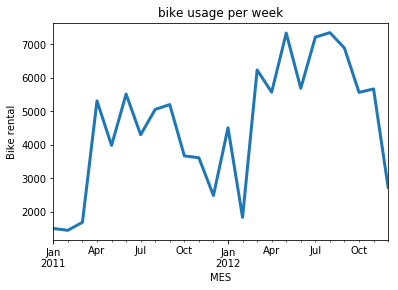

In [17]:
bike['cnt'].asfreq(
    'M',#MES
).plot(linewidth = 3)
#obs: conseguimos observar pois os dados da
#data já estavam agrupados como índices
plt.title('bike usage per week')
plt.xlabel('MES')
plt.ylabel('Bike rental')

Text(0, 0.5, 'Bike rental')

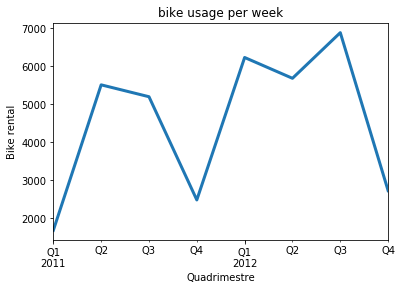

In [18]:
bike['cnt'].asfreq(
    'Q',#MES
).plot(linewidth = 3)
#obs: conseguimos observar pois os dados da
#data já estavam agrupados como índices
plt.title('bike usage per week')
plt.xlabel('Quadrimestre')#Cada quadrimestre tem 3 meses
plt.ylabel('Bike rental')

In [19]:
#sns.pairplot(bike)

In [20]:
x_numerical = bike[['temp', 'hum', 'windspeed','cnt']]

In [21]:
x_numerical.head()

,temp,hum,windspeed,cnt
dteday,,,,
2011-01-01,0.344167,0.805833,0.160446,985
2011-01-02,0.363478,0.696087,0.248539,801
2011-01-03,0.196364,0.437273,0.248309,1349
2011-01-04,0.200000,0.590435,0.160296,1562
2011-01-05,0.226957,0.436957,0.186900,1600


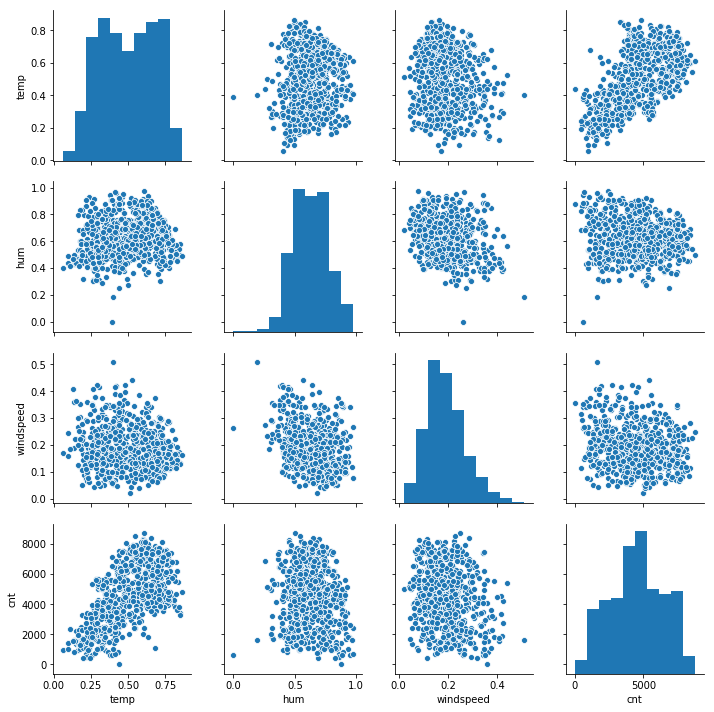

In [22]:
sns.pairplot(x_numerical)

In [23]:
x_numerical.corr()#Correlaciona os dados

,temp,hum,windspeed,cnt
temp,1.000000,0.126963,-0.157944,0.627494
hum,0.126963,1.000000,-0.248489,-0.100659
windspeed,-0.157944,-0.248489,1.000000,-0.234545
cnt,0.627494,-0.100659,-0.234545,1.000000


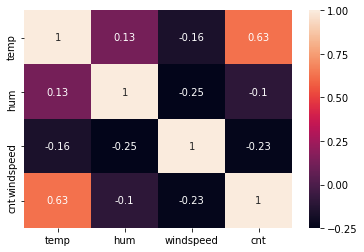

In [24]:
sns.heatmap(
    x_numerical.corr(),
    annot = True, #Colocar os valores
)

#Veja que Laranja => relação de bicicleta com CNT
# é bem forte... restante tem baixa relação

## Tratamento de Dados

In [25]:
bike.head(2)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
dteday,,,,,,,,,,,
2011-01-01,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
2011-01-02,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801


In [26]:
x_cat = bike[['season','yr','mnth','holiday','weekday','workingday','weathersit']]

In [27]:
x_cat.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit
dteday,,,,,,,
2011-01-01,1,0,1,0,6,0,2
2011-01-02,1,0,1,0,0,0,2
2011-01-03,1,0,1,0,1,1,1
2011-01-04,1,0,1,0,2,1,1
2011-01-05,1,0,1,0,3,1,1


In [28]:
# One hot Encoder -> codificação destas variáveis

#Exemplo:

#domingo = 0
#segunda = 1

# O algorítimo pode considerar o domingo menos importante 
# que a segunda feira....

# Ele vai fazer então:

#domingo 0 1 0
#segunda 1 0 0
#terca   0 0 1

In [29]:
#Implementar...

from sklearn.preprocessing import OneHotEncoder

In [30]:
#criar objeto
onehotencoder = OneHotEncoder()
x_cat = onehotencoder.fit_transform(x_cat).toarray()

In [31]:
x_cat

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [32]:
x_cat.shape

(731, 32)

In [33]:
x_cat = pd.DataFrame(x_cat)

In [34]:
x_cat.head(2)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [35]:
x_numerical.head(2)
#Vamos retirar as datas, não é importante para
#prever ...

,temp,hum,windspeed,cnt
dteday,,,,
2011-01-01,0.344167,0.805833,0.160446,985
2011-01-02,0.363478,0.696087,0.248539,801


In [36]:
x_numerical = x_numerical.reset_index()

In [37]:
x_numerical.head()

,dteday,temp,hum,windspeed,cnt
0,2011-01-01,0.344167,0.805833,0.160446,985
1,2011-01-02,0.363478,0.696087,0.248539,801
2,2011-01-03,0.196364,0.437273,0.248309,1349
3,2011-01-04,0.200000,0.590435,0.160296,1562
4,2011-01-05,0.226957,0.436957,0.186900,1600


### Concatenar dois dataframes

pd.concat(...)

In [38]:
X_all = pd.concat([x_cat,x_numerical],axis=1)

In [39]:
X_all

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,dteday,temp,hum,windspeed,cnt
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,2011-01-01,0.344167,0.805833,0.160446,985
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,2011-01-02,0.363478,0.696087,0.248539,801
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,2011-01-03,0.196364,0.437273,0.248309,1349
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,2011-01-04,0.200000,0.590435,0.160296,1562
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,2011-01-05,0.226957,0.436957,0.186900,1600
5,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,2011-01-06,0.204348,0.518261,0.089565,1606
6,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,2011-01-07,0.196522,0.498696,0.168726,1510
7,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,2011-01-08,0.165000,0.535833,0.266804,959
8,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,2011-01-09,0.138333,0.434167,0.361950,822
9,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,2011-01-10,0.150833,0.482917,0.223267,1321


In [40]:
X_all = X_all.drop('dteday', axis = 1)

In [41]:
#Pegar os atributos para separar em X e Y

X = X_all.iloc[:,:-1].values #Só não pega o último
y = X_all.iloc[:,-1:].values #Pega só último

In [48]:
X.shape,y.shape
# x = 731 linhas e 32 colunas
# y = 732 linhas e 1 coluna

((731, 35), (731, 1))

### Normalizar os dados entre 0 e 1

In [43]:
# Antes de começar, vamos normalizar os dados
# do CNT entre 0 e 1.... pra que isso????
# para ficar mais rápido o processamento
from sklearn.preprocessing import MinMaxScaler

#Criar um objeto destaclasse
scaler = MinMaxScaler()

y = scaler.fit_transform(y)

In [44]:
y[:10] #Veja que temos entre a escala de 0 e 1

array([[0.11079153],
       [0.08962264],
       [0.15266912],
       [0.17717441],
       [0.18154625],
       [0.18223654],
       [0.1711919 ],
       [0.10780028],
       [0.09203866],
       [0.14944777]])

In [45]:
min(y),max(y)

(array([0.]), array([1.]))

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,#20% fica no test
)

In [47]:
X_train.shape,X_test.shape

((584, 35), (147, 35))

## Treinamento dos dados e Construção do modelo

In [45]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(
    units = 100,#saida
    activation = 'relu',
    input_shape = (35,)#Entrada
))

model.add(tf.keras.layers.Dense(
    units = 100,
    activation = 'relu',
    #input_shape = (35,)
))

model.add(tf.keras.layers.Dense(
    units = 100,
    activation = 'relu',
    #input_shape = (35,)
))

model.add(tf.keras.layers.Dense(
    units = 1,
    activation = 'linear',#Queremos um número
    #Então trata-se de regressao linear
    
))

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               3600      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 23,901
Trainable params: 23,901
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.compile(optimizer='Adam',loss = 'mean_squared_error')

In [48]:
epochs_hist = model.fit(
    X_train,
    y_train,
    epochs= 5,#epocas
    batch_size= 50,#calculo do erro de 50 em 50 registros
    validation_split= 0.2,# ele separa 20% dos dados
    #para fazer a validação durante o treinamento!
)


Train on 467 samples, validate on 117 samples
Epoch 1/5
467/467 [==============================] - 2s 3ms/sample - loss: 0.0941 - val_loss: 0.0322
Epoch 2/5
467/467 [==============================] - 0s 196us/sample - loss: 0.0288 - val_loss: 0.0189
Epoch 3/5
467/467 [==============================] - 0s 173us/sample - loss: 0.0166 - val_loss: 0.0172
Epoch 4/5
467/467 [==============================] - 0s 232us/sample - loss: 0.0121 - val_loss: 0.0151
Epoch 5/5
467/467 [==============================] - 0s 265us/sample - loss: 0.0094 - val_loss: 0.0142


In [49]:
# Loss = Calcula o erro na base de treinamento
# val_loss = calcula o erro na base de validação
# que a gente pediu no parâmetro "validation_split"

## Predictions

In [50]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

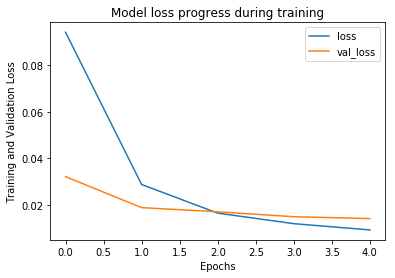

In [51]:
plt.plot(epochs_hist.history['loss'],label = 'loss')
plt.plot(epochs_hist.history['val_loss'], label = 'val_loss')

plt.title('Model loss progress during training')
plt.xlabel('Epochs')
plt.ylabel('Training and Validation Loss')
plt.legend()

In [52]:
# Quer dizer que na intersecção de 5 épocas, 
#nós temos os mesmo pesos para ambos... as 
#vezes não compensa treinar mais épocas

Vamos fazer uma previsão com os dados guardados para treinamento

In [53]:
y_predict = model.predict(X_test)

In [54]:
y_predict

array([[0.19800791],
       [0.58212876],
       [0.4784212 ],
       [0.5892456 ],
       [0.5804356 ],
       [0.6382949 ],
       [0.34899694],
       [0.23624405],
       [0.48703808],
       [0.5401697 ],
       [0.10013955],
       [0.4742996 ],
       [0.59281904],
       [0.5123987 ],
       [0.6468297 ],
       [0.49847955],
       [0.79394567],
       [0.8594092 ],
       [0.5687405 ],
       [0.34900755],
       [0.22510096],
       [0.3757831 ],
       [0.8388974 ],
       [0.53055483],
       [0.66473556],
       [0.39338037],
       [0.56207925],
       [0.40401012],
       [0.13646263],
       [0.53582823],
       [0.56839967],
       [0.4681892 ],
       [0.38284147],
       [0.8049829 ],
       [0.77589417],
       [0.86139137],
       [0.29886523],
       [0.39800668],
       [0.819126  ],
       [0.3142615 ],
       [0.41366154],
       [0.6387893 ],
       [0.19511327],
       [0.5419335 ],
       [0.43721113],
       [0.48077643],
       [0.60140777],
       [0.470

Text(0, 0.5, 'y_predict')

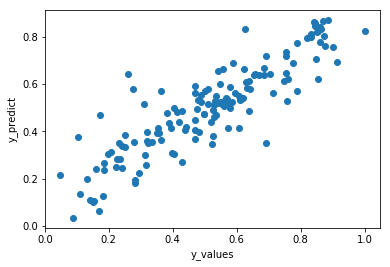

In [55]:
plt.plot(y_test,y_predict,'o')
plt.xlabel('y_values')
plt.ylabel('y_predict')


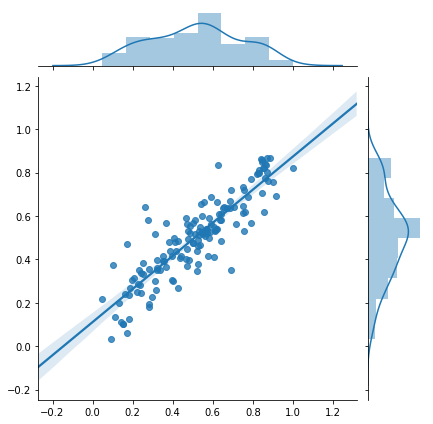

In [56]:
sns.jointplot(x=y_test,y=y_predict, kind ='reg' )

In [57]:
# RETORNAR A ESCALA ORIGINAL

In [58]:
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)

Text(0, 0.5, 'y_predict')

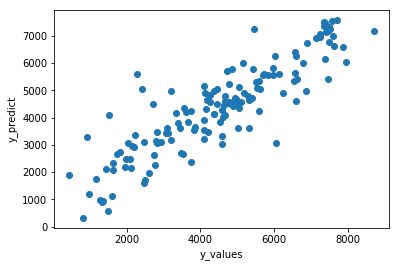

In [59]:
plt.plot(y_test_orig,y_predict_orig,'o')
plt.xlabel('y_values')
plt.ylabel('y_predict')

<img src = "./img/erro.png" style="max-width:50%; width: 50%;">

In [60]:
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error
import math

In [61]:
# Calculo das métricas de ERRO

k = X_test.shape[1]
k

35

In [62]:
n = len(X_test)
n

147

In [63]:
mean_abs = mean_absolute_error(y_test_orig,y_predict_orig)
mean_esq = mean_squared_error(y_test_orig,y_predict_orig)
mean_sqrt = math.sqrt(mean_esq)
r2 = r2_score(y_test_orig,y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

In [64]:
print("MEA: ", mean_abs)
print("MEE: ", mean_esq)
print("MES: ", mean_sqrt)
print("MEE: ", mean_esq)
print("R2: ", r2)
print("R2_ajustado: ", adj_r2)


MEA:  684.7204388469255
MEE:  844103.201484199
MES:  918.750891963757
MEE:  844103.201484199
R2:  0.7746654070415778
R2_ajustado:  0.7036139588114447


Quanto mais alto o R2, mais indica que temos variáveis no nosso modelo que não estão contribuindo para ele... o que indica que seria bom apagar algumas variáveis e ver se esse valor de R2 e R2 ajustado melhore

# Salvar o modelo

In [65]:
model.save_weights('./treino/salvar_treino_01')


In [50]:
#CRIE UMA FUNÇÃO FICA MAIS FÁCIL
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(
    units = 100,#saida
    activation = 'relu',
    input_shape = (35,)#Entrada
))

model.add(tf.keras.layers.Dense(
    units = 100,
    activation = 'relu',
    #input_shape = (35,)
))

model.add(tf.keras.layers.Dense(
    units = 100,
    activation = 'relu',
    #input_shape = (35,)
))

model.add(tf.keras.layers.Dense(
    units = 1,
    activation = 'linear',#Queremos um número
    #Então trata-se de regressao linear
    
))

In [51]:
model.compile(optimizer='Adam',loss = 'mean_squared_error')

Depois que cria o modelo, podemos logar da onde paramos com as épocas....

In [52]:
model.load_weights('./treino/salvar_treino_01')
# ANTES DE CHAMAR NOVAMENTE TEM QUE CRIAR O MODELO!!!!! 

# POR ISSO É BOM CRIAR UMA FUNÇÃO PARA CRIAR O MODELO... E UMA FUNÇÃO PARA EXECUTAR!!!

In [53]:
#executar o modelo!!!!(crie uma função ... fica mais fácil)

epochs_hist = model.fit(
    X_train,
    y_train,
    epochs= 5,#epocas
    batch_size= 50,#calculo do erro de 50 em 50 registros
    validation_split= 0.2,# ele separa 20% dos dados
    #para fazer a validação durante o treinamento!
)


Train on 467 samples, validate on 117 samples
Epoch 1/5
467/467 [==============================] - 1s 2ms/sample - loss: 0.0102 - val_loss: 0.0079
Epoch 2/5
467/467 [==============================] - 0s 306us/sample - loss: 0.0086 - val_loss: 0.0081
Epoch 3/5
467/467 [==============================] - 0s 351us/sample - loss: 0.0075 - val_loss: 0.0084
Epoch 4/5
467/467 [==============================] - 0s 260us/sample - loss: 0.0069 - val_loss: 0.0075
Epoch 5/5
467/467 [==============================] - 0s 285us/sample - loss: 0.0061 - val_loss: 0.0074
